In [1]:
import seaborn as sns
from google.colab import files
uploaded=files.upload()


Saving AmesHousing.xls to AmesHousing.xls


In [4]:
import pandas as pd
import io
housing=pd.read_excel(io.BytesIO(uploaded["AmesHousing.xls"]) )
numerical=['SalePrice', 'Lot Area','Overall Qual','Overall Cond', '1st Flr SF','2nd Flr SF', 'Bedroom AbvGr']
categorical=['MS Zoning','Lot Shape','Neighborhood', 'Central Air', 'Sale Condition','Mo Sold','Yr Sold']
housing=housing[numerical+categorical]
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SalePrice       2930 non-null   int64 
 1   Lot Area        2930 non-null   int64 
 2   Overall Qual    2930 non-null   int64 
 3   Overall Cond    2930 non-null   int64 
 4   1st Flr SF      2930 non-null   int64 
 5   2nd Flr SF      2930 non-null   int64 
 6   Bedroom AbvGr   2930 non-null   int64 
 7   MS Zoning       2930 non-null   object
 8   Lot Shape       2930 non-null   object
 9   Neighborhood    2930 non-null   object
 10  Central Air     2930 non-null   object
 11  Sale Condition  2930 non-null   object
 12  Mo Sold         2930 non-null   int64 
 13  Yr Sold         2930 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 320.6+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

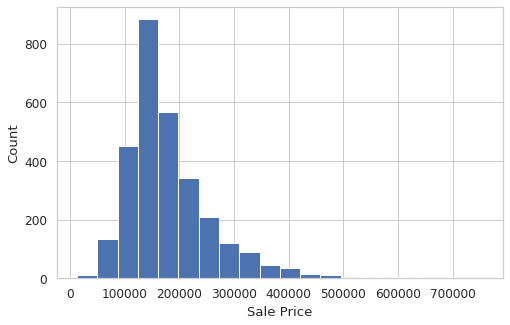

In [6]:
import seaborn as sns
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize':[8,5]})
sns.distplot(housing['SalePrice'], norm_hist=False, kde=False, bins=20,
hist_kws={'alpha':1}).set(xlabel='Sale Price', ylabel='Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09927ac2e8>,
      dtype=object)

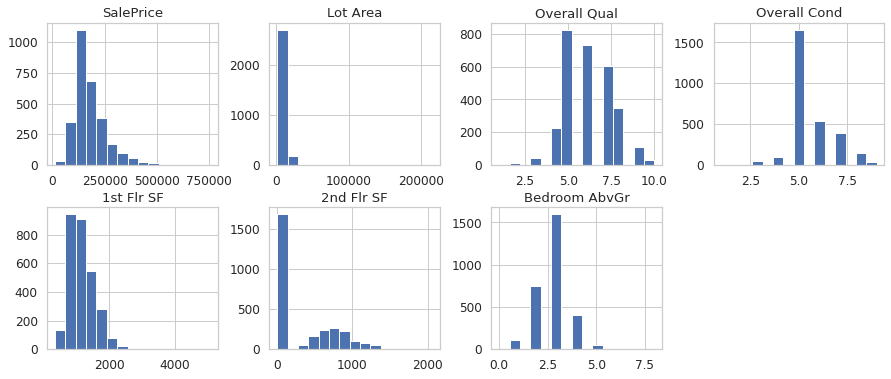

In [7]:
housing[numerical].hist(bins=15, figsize=(15,6), layout=(2,4))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


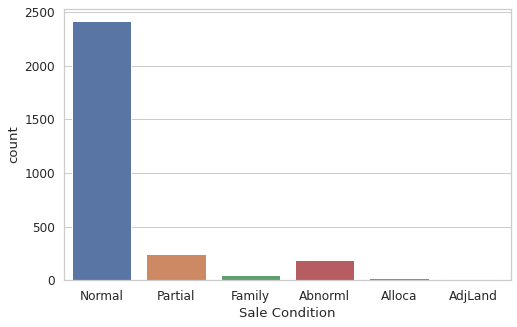

In [8]:
sns.countplot(housing['Sale Condition'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

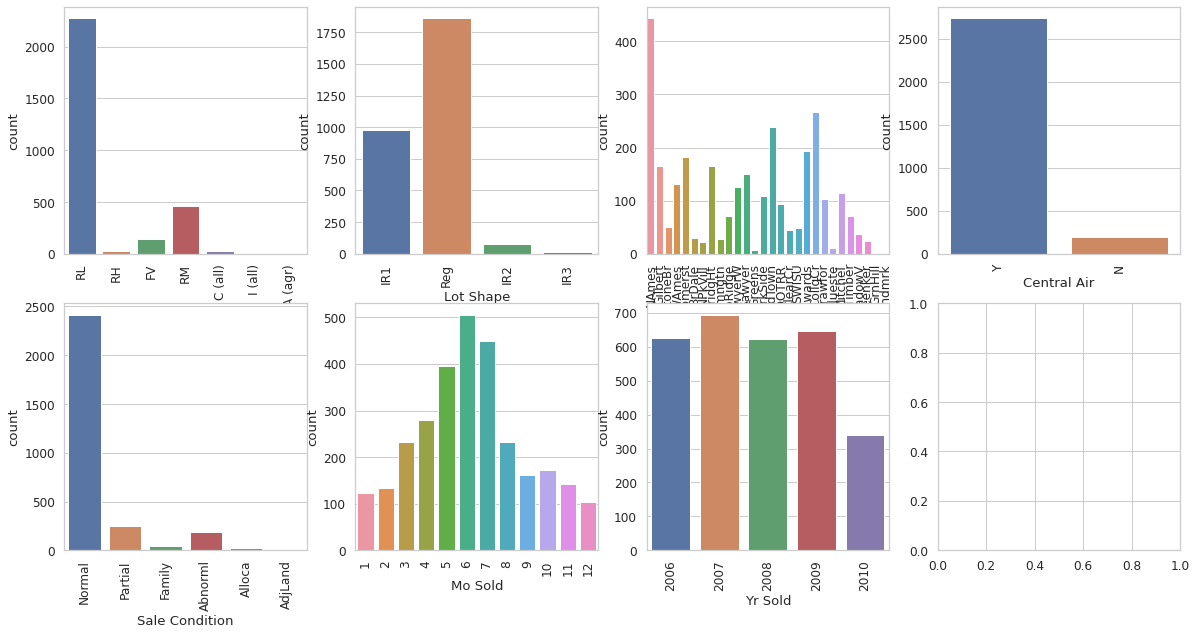

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
 sns.countplot(housing[variable], ax=subplot)
 for label in subplot.get_xticklabels():label.set_rotation(90)


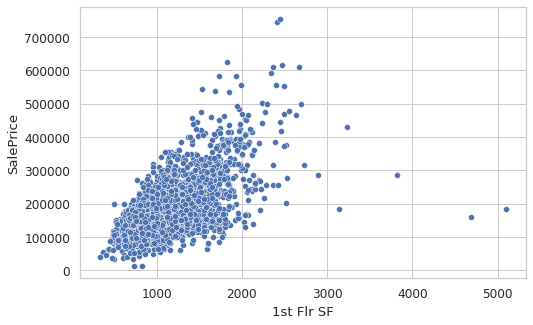

In [11]:
sns.scatterplot(x=housing['1st Flr SF'], y=housing['SalePrice']);

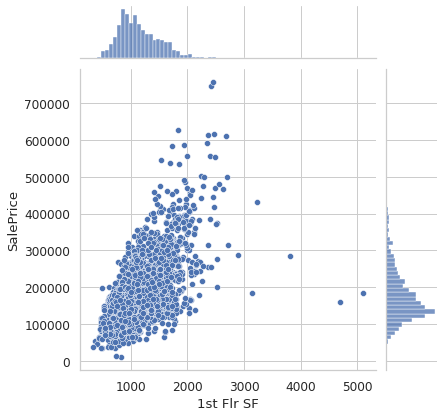

In [12]:
sns.jointplot(x=housing['1st Flr SF'], y=housing['SalePrice']);


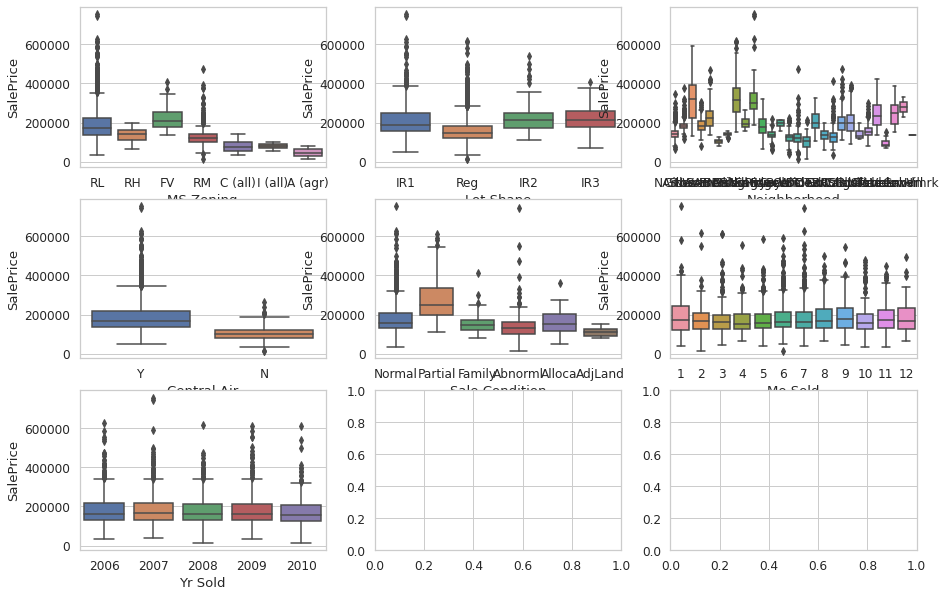

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
 sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)


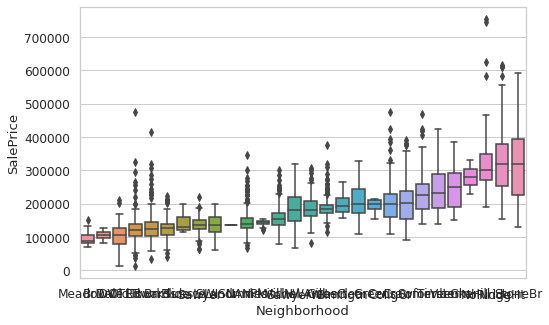

In [16]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))
